In [1]:
#python version-----3.7.3

In [2]:
import numpy as np
import pandas as pd
import imp

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# Data Exploration

In [5]:
data = pd.read_csv('D:\Mtech project\Dataset\dataset1.csv')

In [6]:
data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,...,Urban_or_Rural_Area,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway
0,525680,178240,-0.191170,51.489096,2,3,17:42,6,30,0,...,1,9,0,18,0,0,0,0,0,0
1,524170,181650,-0.211708,51.520075,3,4,17:36,3,30,6,...,1,11,0,4,0,3,0,0,0,0
2,524520,182240,-0.206458,51.525301,3,5,00:15,6,30,0,...,1,11,0,17,0,0,0,4,0,0
3,526900,177530,-0.173862,51.482442,3,6,10:35,6,30,0,...,1,9,0,2,0,0,0,0,0,0
4,528060,179040,-0.156618,51.495752,3,2,21:13,6,30,0,...,1,9,0,18,0,0,0,0,0,0


# Data Processing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Location_Easting_OSGR                    99999 non-null  int64  
 1   Location_Northing_OSGR                   99999 non-null  int64  
 2   Longitude                                99999 non-null  float64
 3   Latitude                                 99999 non-null  float64
 4   Accident_Severity                        99999 non-null  int64  
 5   Day_of_Week                              99999 non-null  int64  
 6   Time                                     99999 non-null  object 
 7   Road_Type                                99999 non-null  int64  
 8   Speed_limit                              99999 non-null  int64  
 9   Junction_Detail                          99999 non-null  int64  
 10  Junction_Control                         64599

In [8]:
missing_data = data.isnull().sum()
print(missing_data)

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Accident_Severity                              0
Day_of_Week                                    0
Time                                           0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                           35400
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Vehicle_Type                                   0
Towing_and_Articulat

In [9]:
objList = data.columns
print(objList)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Accident_Severity', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway'],
      dtype='object')


In [10]:
data = data.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','Time','Junction_Control'], axis=1, errors='ignore')

In [11]:
missing_data = data.isnull().sum()
print(missing_data)

Longitude                                  0
Latitude                                   0
Accident_Severity                          0
Day_of_Week                                0
Road_Type                                  0
Speed_limit                                0
Junction_Detail                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
Vehicle_Type                               0
Towing_and_Articulation                    0
Vehicle_Manoeuvre                          0
Vehicle_Location-Restricted_Lane           0
Junction_Location                          0
Skidding_and_Overturning                   0
Hit_Object_in_Carriageway                  0
Vehicle_Le

In [12]:
df = pd.DataFrame(data)
    
df

,Longitude,Latitude,Accident_Severity,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,...,Urban_or_Rural_Area,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway
0,-0.191170,51.489096,2,3,6,30,0,0,1,1,...,1,9,0,18,0,0,0,0,0,0
1,-0.211708,51.520075,3,4,3,30,6,0,5,4,...,1,11,0,4,0,3,0,0,0,0
2,-0.206458,51.525301,3,5,6,30,0,0,0,4,...,1,11,0,17,0,0,0,4,0,0
3,-0.173862,51.482442,3,6,6,30,0,0,0,1,...,1,9,0,2,0,0,0,0,0,0
4,-0.156618,51.495752,3,2,6,30,0,0,0,7,...,1,9,0,18,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.792574,53.089484,3,4,6,40,3,0,8,1,...,1,9,0,18,0,1,0,0,0,0
99995,-0.780208,53.051511,3,2,6,40,6,0,0,1,...,1,9,0,3,0,1,0,0,0,0
99996,-0.805473,53.152093,3,3,3,70,5,0,0,1,...,2,9,0,13,0,0,0,0,0,0
99997,-0.795433,53.067308,3,6,6,40,3,0,0,4,...,1,9,0,18,0,0,1,10,0,7


In [13]:
df = df.dropna(how = 'any')

In [14]:
missing_data = df.isnull().sum()
print(missing_data)

Longitude                                  0
Latitude                                   0
Accident_Severity                          0
Day_of_Week                                0
Road_Type                                  0
Speed_limit                                0
Junction_Detail                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
Vehicle_Type                               0
Towing_and_Articulation                    0
Vehicle_Manoeuvre                          0
Vehicle_Location-Restricted_Lane           0
Junction_Location                          0
Skidding_and_Overturning                   0
Hit_Object_in_Carriageway                  0
Vehicle_Le

In [15]:
df.head()

,Longitude,Latitude,Accident_Severity,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,...,Urban_or_Rural_Area,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway
0,-0.191170,51.489096,2,3,6,30,0,0,1,1,...,1,9,0,18,0,0,0,0,0,0
1,-0.211708,51.520075,3,4,3,30,6,0,5,4,...,1,11,0,4,0,3,0,0,0,0
2,-0.206458,51.525301,3,5,6,30,0,0,0,4,...,1,11,0,17,0,0,0,4,0,0
3,-0.173862,51.482442,3,6,6,30,0,0,0,1,...,1,9,0,2,0,0,0,0,0,0
4,-0.156618,51.495752,3,2,6,30,0,0,0,7,...,1,9,0,18,0,0,0,0,0,0


# Visualization - EDA

<AxesSubplot:>

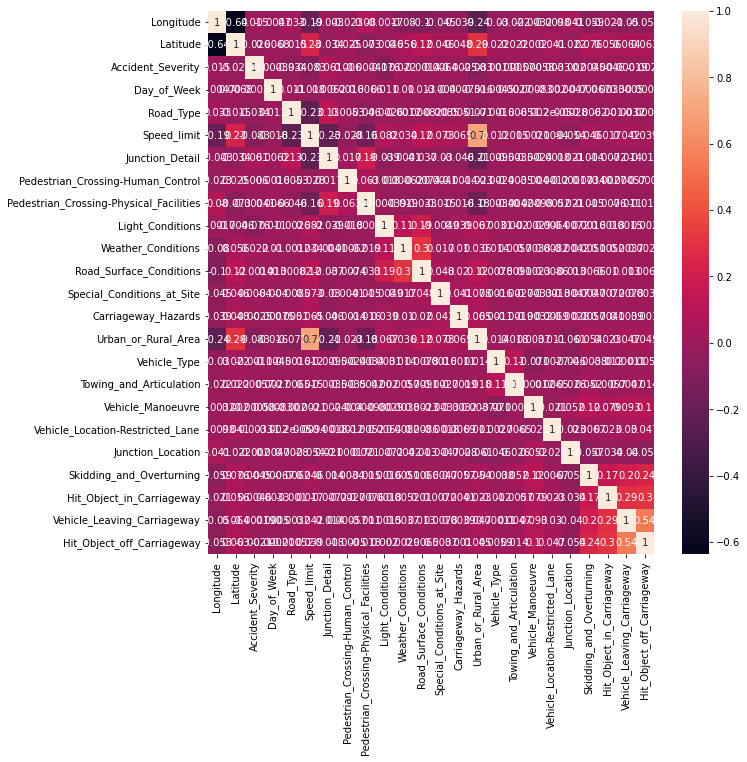

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Hit_Object_off_Carriageway', ylabel='count'>

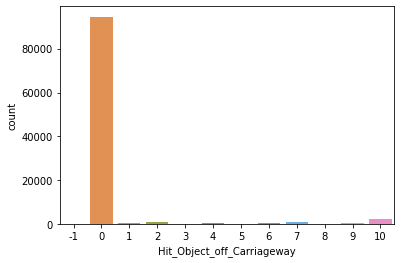

In [17]:
sns.countplot(x="Hit_Object_off_Carriageway", data = df)

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

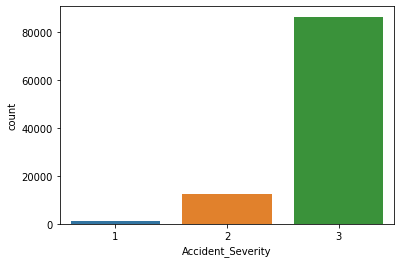

In [18]:
sns.countplot(x="Accident_Severity", data = df)

In [19]:
df = df[['Longitude', 'Latitude', 'Day_of_Week',
       'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', 'Accident_Severity']]

In [20]:
df.to_csv('processed.csv')

# Feature Selection

In [21]:
#df = df[0:20000]

In [22]:
X = df.iloc[:, 0:23]
y = df.iloc[:,23]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (64999, 23) (64999,)
Test set: (35000, 23) (35000,)


# Machine Learning

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)

In [26]:
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[    0     8   423]
 [    3    32  4282]
 [    2    99 30151]]


In [27]:
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Classification Report for RF: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.23      0.01      0.01      4317
           3       0.87      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.37      0.33      0.31     35000
weighted avg       0.78      0.86      0.80     35000



In [28]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *100 
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.8751880569378544
86.23714285714286
0.10601994500215355
97.74024195389181


# Voting Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[    0     7   424]
 [    4    20  4293]
 [    7    81 30164]]


In [30]:
print("*Classification Report for Voting: ")
print(classification_report(y_test, predictions))

*Classification Report for Voting: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.19      0.00      0.01      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.35      0.33      0.31     35000
weighted avg       0.77      0.86      0.80     35000



In [31]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 100
print(val3)
from sklearn import metrics
VOT_sensitivity = ((TP / float(FN + TP))) * 100

print(VOT_sensitivity)
VOT_specificity = ((TN / (TN + FP))) * 100

print(VOT_specificity)

0.8751953238034609
86.24000000000001
0.06626027034190299
98.14814814814815


# KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *100 
print(val2)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP)))* 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

*Confusion Matrix for KNN: 
[[    7    33   391]
 [   63   238  4016]
 [  295  1365 28592]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           1       0.02      0.02      0.02       431
           2       0.15      0.06      0.08      4317
           3       0.87      0.95      0.90     30252

    accuracy                           0.82     35000
   macro avg       0.34      0.34      0.33     35000
weighted avg       0.77      0.82      0.79     35000

0.8756540294057467
82.39142857142858
0.8255289628858827
74.63296784984203


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) *100 
print(val4)
from sklearn import metrics
LR_sensitivity = ((TP / float(FN + TP)))* 100

print(LR_sensitivity)
LR_specificity = ((TN / (TN + FP))) * 100

print(LR_specificity)

*Confusion Matrix for LR: 
[[    0     0   431]
 [    0     0  4317]
 [    0     0 30252]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.00      0.00      0.00      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.29      0.33      0.31     35000
weighted avg       0.75      0.86      0.80     35000

0.8751193265642628
86.43428571428572
0.0
100.0


# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val5 = accuracy_score(y_test, predictions) *100 
print(val5)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP)))* 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

*Confusion Matrix for DT: 
[[   12    82   337]
 [   88   684  3545]
 [  392  4165 25695]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           1       0.02      0.03      0.03       431
           2       0.14      0.16      0.15      4317
           3       0.87      0.85      0.86     30252

    accuracy                           0.75     35000
   macro avg       0.34      0.35      0.34     35000
weighted avg       0.77      0.75      0.76     35000

0.8759423861069553
75.40285714285714
2.5929716820197886
45.97924773022049


# Linear Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_test)
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LDA: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val6 = accuracy_score(y_test, predictions) *100 
print(val6)
from sklearn import metrics
LDA_sensitivity = ((TP / float(FN + TP)))* 100

print(LDA_sensitivity)
LDA_specificity = ((TN / (TN + FP))) * 100

print(LDA_specificity)

*Confusion Matrix for LDA: 
[[    0     0   431]
 [    0     0  4317]
 [    0     0 30252]]
*Classification Report for LDA: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.00      0.00      0.00      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.29      0.33      0.31     35000
weighted avg       0.75      0.86      0.80     35000

0.8751193265642628
86.43428571428572
0.0
100.0


# Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val7 = accuracy_score(y_test, predictions) *100 
print(val7)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP)))* 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

*Confusion Matrix for GNB: 
[[   29    50   352]
 [  179   240  3898]
 [ 1004   746 28502]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           1       0.02      0.07      0.04       431
           2       0.23      0.06      0.09      4317
           3       0.87      0.94      0.90     30252

    accuracy                           0.82     35000
   macro avg       0.38      0.36      0.34     35000
weighted avg       0.78      0.82      0.79     35000

0.8760558317857785
82.20285714285714
0.8350149606847123
83.9362618432386


# AdaBoost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
print("*Confusion Matrix for ABC: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ABC: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val8 = accuracy_score(y_test, predictions) *100 
print(val8)
from sklearn import metrics
ABC_sensitivity = ((TP / float(FN + TP)))* 100

print(ABC_sensitivity)
ABC_specificity = ((TN / (TN + FP))) * 100

print(ABC_specificity)

*Confusion Matrix for ABC: 
[[    0     2   429]
 [    3     6  4308]
 [    1    64 30187]]
*Classification Report for ABC: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.08      0.00      0.00      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.32      0.33      0.31     35000
weighted avg       0.76      0.86      0.80     35000

0.875191667872125
86.2657142857143
0.019872155797701452
98.53613906678865


# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predictions = GBC.predict(X_test)
print("*Confusion Matrix for GBC: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GBC: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val9 = accuracy_score(y_test, predictions) *100 
print(val9)
from sklearn import metrics
GBC_sensitivity = ((TP / float(FN + TP)))* 100

print(GBC_sensitivity)
GBC_specificity = ((TN / (TN + FP))) * 100

print(GBC_specificity)

*Confusion Matrix for GBC: 
[[    0     0   431]
 [    0     0  4317]
 [    4     3 30245]]
*Classification Report for GBC: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.00      0.00      0.00      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.29      0.33      0.31     35000
weighted avg       0.75      0.86      0.80     35000

0.8751048748734269
86.41428571428571
0.0
99.93055555555556


# Support Vector Machine

In [39]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val10 = accuracy_score(y_test, predictions) *100 
print(val10)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP)))* 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

*Confusion Matrix for SVM: 
[[    0     0   431]
 [    0     0  4317]
 [    0     0 30252]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       431
           2       0.00      0.00      0.00      4317
           3       0.86      1.00      0.93     30252

    accuracy                           0.86     35000
   macro avg       0.29      0.33      0.31     35000
weighted avg       0.75      0.86      0.80     35000

0.8751193265642628
86.43428571428572
0.0
100.0


# ExtraTree Classifier

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)
predictions = ETC.predict(X_test)
print("*Confusion Matrix for ETC: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ETC: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[1, 1]
TN = confusion[1, 2]
FP = confusion[2, 1]
FN = confusion[2, 2]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val11 = accuracy_score(y_test, predictions) *100 
print(val11)
from sklearn import metrics
ETC_sensitivity = ((TP / float(FN + TP)))* 100

print(ETC_sensitivity)
ETC_specificity = ((TN / (TN + FP))) * 100

print(ETC_specificity)

*Confusion Matrix for ETC: 
[[    1    17   413]
 [    8    98  4211]
 [   20   468 29764]]
*Classification Report for ETC: 
              precision    recall  f1-score   support

           1       0.03      0.00      0.00       431
           2       0.17      0.02      0.04      4317
           3       0.87      0.98      0.92     30252

    accuracy                           0.85     35000
   macro avg       0.36      0.34      0.32     35000
weighted avg       0.77      0.85      0.80     35000

0.8752497032512087
85.32285714285715
0.32817627754336615
89.9978627911947


# Comparison

# Accuracy

In [41]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11]

In [42]:
#make variabel for save the result and to show it
classifier = ('Random Forest','KNN','Voting Classifier','Logistic Regression','LDA','CART-DT','GNB','AdaBoost','GBM','ExtraTree','SVM')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[ 0  1  2  3  4  5  6  7  8  9 10]
[86.23714285714286, 82.39142857142858, 86.24000000000001, 86.43428571428572, 75.40285714285714, 86.43428571428572, 82.20285714285714, 86.2657142857143, 86.41428571428571, 86.43428571428572, 85.32285714285715]


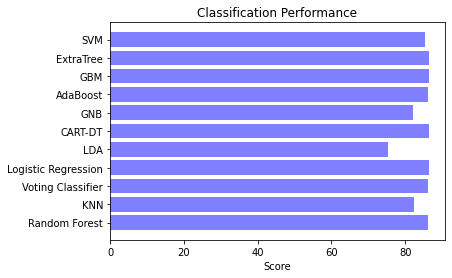

In [43]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity & Sensitvity

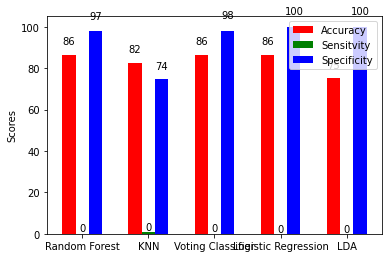

In [44]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4,val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,KNN_sensitivity,VOT_sensitivity,LR_sensitivity,LDA_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,KNN_specificity,VOT_specificity,LR_specificity,LDA_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Random Forest','KNN','Voting Classifier','Logistic Regression','LDA') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

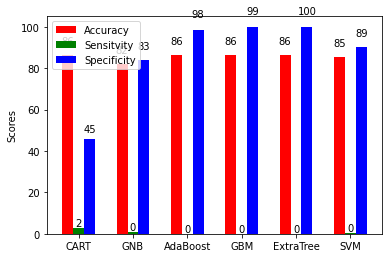

In [45]:
import numpy as np
import matplotlib.pyplot as plt

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val6,val7,val8,val9,val10,val11]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [DT_sensitivity,GNB_sensitivity,ABC_sensitivity,GBC_sensitivity,SVM_sensitivity,ETC_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [DT_specificity,GNB_specificity,ABC_specificity,GBC_specificity,SVM_specificity,ETC_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('CART','GNB','AdaBoost','GBM','ExtraTree','SVM') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [46]:
import joblib
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']

# Reinforcement Learning

In [47]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
from sklearn.metrics import accuracy_score
import imp
import matplotlib.pyplot as plt
from sklearnmetrics import epochcal,epochcal1,process,eprocess
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting
  
matplotlib.style.use('ggplot')

In [48]:
filename='dataset1.csv'
env = WindyGridworldEnv()
dataset=pd.read_csv('D:\Mtech project\Dataset\dataset1.csv')
print(len(dataset))

qlacc=0
eqlacc=0

99999


In [49]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.

    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array
    of length of the action space(set of possible actions).
    """
    def policyFunction(state):

        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions

        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities

    return policyFunction


In [50]:
def qLearning(env, num_episodes, discount_factor = 1.0,alpha = 0.6, epsilon = 0.1):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""

    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))	

    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    # For every episode
    for ith_episode in range(num_episodes):

        # Reset the environment and pick the first action
        state = env.reset()

        for t in itertools.count():

            # get probabilities of all actions from current state
            action_probabilities = policy(state)

            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                    len(action_probabilities)),
                    p = action_probabilities)

            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            my_module=imp.load_compiled("my_module", "sklearn_metrics_accuracyscore.pyc")
            global qlacc
            qlacc=my_module.acc("QL")
            #print(qlacc)
            # TD Update
            best_next_action = np.argmax(Q[next_state])	
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            # done is True if episode terminated
            if done:
                break

            state = next_state
            

    return Q, stats


In [51]:
Q,stats = qLearning(env, 1000)
Q=process(dataset,Q)
Q

defaultdict(<function __main__.qLearning.<locals>.<lambda>()>,
            {30: array([-15.99897646, -15.        , -15.99999998, -15.99999998]),
             20: array([-15.15272353, -14.99994289, -15.47673725, -15.56877133]),
             10: array([-14.3647164 , -14.47809326, -15.30148423, -14.67667479]),
             0: array([-14.1802787 , -14.11618629, -14.13544879, -14.19040517]),
             11: array([-14.09472196, -13.89233438, -14.47560622, -14.02999845]),
             1: array([-13.69277219, -13.69127834, -14.13754285, -13.59668201]),
             2: array([-13.2104891 , -12.96585149, -13.72362908, -13.30610978]),
             3: array([-12.81226742, -11.99999797, -12.64869213, -12.30038076]),
             4: array([-11.95150708, -11.        , -11.95357028, -12.74275173]),
             5: array([-10.99877162, -10.        , -10.99943921, -11.9987994 ]),
             6: array([-10.        ,  -9.        ,  -9.99999997, -10.99999993]),
             7: array([ -8.99999996,  -8. 

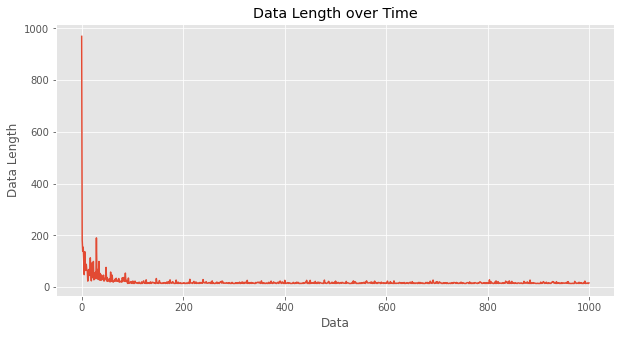

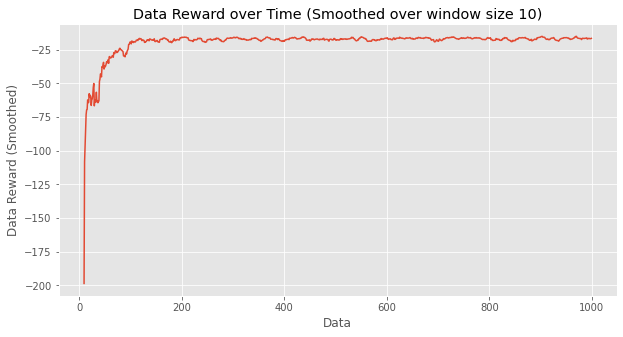

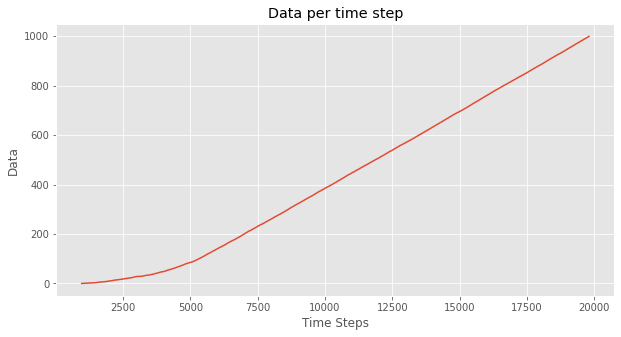

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [52]:
plotting.plot_data_stats(stats)

In [53]:
env = WindyGridworldEnv()
dataset=pd.read_csv('D:\Mtech project\Dataset\dataset1.csv')

In [54]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.

    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array
    of length of the action space(set of possible actions).
    """
    def policyFunction(state):

        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions

        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities

    return policyFunction

In [55]:
def enhancedqLearning(env, num_episodes, discount_factor = 1.0,alpha = 0.6, epsilon = 0.1):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""

    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))	

    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    # For every episode
    for ith_episode in range(num_episodes):

        # Reset the environment and pick the first action
        state = env.reset()

        for t in itertools.count():

            # get probabilities of all actions from current state
            action_probabilities = policy(state)

            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                    len(action_probabilities)),
                    p = action_probabilities)

            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            for i in range(len(stats)):
                mval=stats[i]
                for j in range(len(Q)):
                    qval=Q[j]
            
            my_module=imp.load_compiled("my_module", "sklearn_metrics_accuracyscore.pyc")
            global eqlacc
            eqlacc=my_module.acc("EQL")
            # TD Update
            best_next_action = np.argmax(Q[next_state])	
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            # done is True if episode terminated
            if done:
                break

            state = next_state

    return Q, stats


In [56]:
Q,stats = enhancedqLearning(env, 1000)
Q=eprocess(dataset,Q)
Q

defaultdict(<function __main__.enhancedqLearning.<locals>.<lambda>()>,
            {30: array([-15.9999985 , -15.        , -15.99983408, -16.        ]),
             0: array([-14.66304   , -14.62964129, -14.83871018, -14.4       ]),
             1: array([-14.20823638, -13.88133934, -13.81685157, -14.3000775 ]),
             20: array([-15.15568925, -14.99999994, -15.58958207, -15.35727819]),
             2: array([-13.2       , -12.97641376, -13.37257882, -13.85642088]),
             3: array([-12.58248816, -11.99999836, -12.442908  , -12.15881134]),
             4: array([-11.99476086, -11.        , -11.87588349, -12.89866836]),
             5: array([-10.991808  , -10.        , -10.97938431, -11.99979668]),
             10: array([-15.09681258, -14.68297773, -14.85394042, -14.99495112]),
             6: array([-10.,  -9., -10., -11.]),
             7: array([ -8.99999998,  -8.        ,  -9.        , -10.        ]),
             8: array([-8., -7., -8., -9.]),
             9: array(

In [57]:
qlacc

93.44

In [58]:
eqlacc

94.01

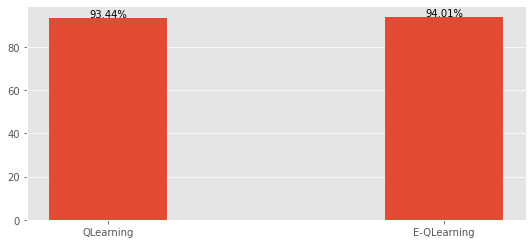

In [59]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = ["QLearning","E-QLearning"]
y = [qlacc, eqlacc]

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')

plt.show()

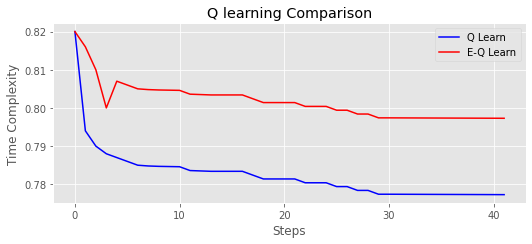

In [60]:
nodes,qdata=epochcal()
nodes1,qdata1=epochcal1()
plt.plot(nodes, qdata,label = "Q Learn", color='blue')
plt.plot(nodes1, qdata1,label = "E-Q Learn", color='red')
plt.xlabel('Steps')
plt.ylabel('Time Complexity')
plt.title('Q learning Comparison')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
my_module=imp.load_compiled("my_module","confusionmodel.cpython-37.pyc")
actual=my_module.y_pred()
predicted=my_module.x_pred()



# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[23  3]
 [ 2 23]]
Outcome values : 
 23 3 2 23
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90        26
           0       0.88      0.92      0.90        25

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51

